# Notas
Este notebook é voltado apenas para estudos pessoais de ML e utiliza os seguintes notebooks como referência:

https://www.kaggle.com/code/aliffaagnur/house-price-prediction-with-eda

# Bibliotecas

In [110]:
# Bibliotecas
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor, GradientBoostingRegressor, BaggingRegressor, StackingRegressor 
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, PoissonRegressor, RidgeCV, LassoCV
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score , KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler, PowerTransformer , RobustScaler 
from sklearn.decomposition import PCA
from sklearn.inspection import permutation_importance


# !pip install -q lightgbm xgboost lazypredict optuna
import lightgbm
from lightgbm import LGBMRegressor
import xgboost as xgb
from xgboost import XGBRegressor
from lazypredict.Supervised import LazyRegressor
import optuna

# Carregando Dados

In [113]:
train = pd.read_csv('../data/train.csv', index_col="Id")
test = pd.read_csv('../data/test.csv', index_col="Id")
submission = pd.read_csv('../data/sample_submission.csv')

print(f'train carregada! {train.shape}')
print(f'test carregada! {test.shape}')
print(f'submission carregada! {submission.shape}')

train carregada! (1460, 80)
test carregada! (1459, 79)
submission carregada! (1459, 2)


In [25]:
dados_combinados = pd.concat((train, test), axis=0)

# Análise Exploratória

## Informações Gerais

In [13]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [14]:
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

In [16]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1459 entries, 1461 to 2919
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          107 non-null    object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuilt 

## Valores nulos

In [ ]:
# Comparando nulos entre train e test
train_na = train.isna().sum()
train_na.drop(labels='SalePrice', axis=0, inplace=True) # dropar target para comparar amabas as bases

test_na  = test.isna().sum()

train_na.compare(test_na).sort_values(by='self', ascending=False)

,self,other
PoolQC,1453.0,1456.0
MiscFeature,1406.0,1408.0
Alley,1369.0,1352.0
Fence,1179.0,1169.0
MasVnrType,872.0,894.0
FireplaceQu,690.0,730.0
LotFrontage,259.0,227.0
GarageType,81.0,76.0
GarageYrBlt,81.0,78.0
GarageFinish,81.0,78.0


In [ ]:
# Para colunas numéricas, prencheremos com 0
# Para colunas com poucos nulos, como Electrical, MsZoning, Functional, KitchenQual, Exterior2nd, Exterior1st, Utilities, SaleType, preencheremos com a moda
# O restante será preenchido com "Unknown"

In [ ]:
# Checando porcentagem de valores nulos
missing_value = pd.DataFrame(data=train.isna().sum(), index=train.columns, columns=['NA'])

# Adicionando coluna de %
missing_value['%'] = (missing_value['NA'] / 1460) * 100 # 1460 observações
missing_value = missing_value.sort_values(by='%',ascending=False)

missing_value.head(20) 

## Com base no output, podemos deletar as features PoolQC, MiscFeature, Alley, Fence, FireplaceQU, LotFrontage

,NA,%
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
MasVnrType,872,59.726027
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageYrBlt,81,5.547945
GarageCond,81,5.547945
GarageType,81,5.547945


## Distribuição dos dados

In [19]:
# Separando em tipos de variável 

features_categoricas = train.select_dtypes(include='object').columns.tolist()

features_numericas   = train.select_dtypes(include=['int64', 'float64']).columns.tolist()
features_numericas   = [col for col in features_numericas if col != 'SalePrice']

features_discretas    = [col for col in features_numericas if len(train[col].unique()) < 25]
features_continuas  = [col for col in features_numericas if col not in features_discretas]

print(f'Total de features categóricas: {len(features_categoricas)}')
print(f'Total de features numéricas: {len(features_numericas)}')
print(f'Total de features discretas: {len(features_discretas)}')
print(f'Total de features continuas: {len(features_continuas)}')

Total de features categóricas: 43
Total de features numéricas: 36
Total de features discretas: 18
Total de features continuas: 18


In [ ]:
# Checando assimetria

# Features muito assimétricas podem:
    # - Prejudicar o desempenho de alguns modelos de machine learning (especialmente os que assumem normalidade, como regressão linear).
    # - Indicar necessidade de transformação (ex: log, raiz quadrada) para melhorar a distribuição dos dados.

# Valor perto de 0 → distribuição simétrica.
# Valor positivo → cauda longa à direita.
# Valor negativo → cauda longa à esquerda.

# Qualquer featura com valor de assimetria maior que 1 ou -1 será transformada

train_assimetria = train[features_numericas].skew().sort_values(ascending=False)
test_assimetria  = test[features_numericas].skew().sort_values(ascending=False)

assimetria_media = (train_assimetria + test_assimetria) / 2
assimetria_media = assimetria_media.sort_values(ascending=False)

print(assimetria_media)

MiscVal          22.275991
PoolArea         17.512631
LowQualFinSF     12.589298
3SsnPorch        11.414279
LotArea           7.661452
KitchenAbvGr      4.283726
BsmtFinSF2        4.148303
ScreenPorch       3.955229
BsmtHalfBath      3.941634
EnclosedPorch     3.879522
MasVnrArea        2.601230
OpenPorchSF       2.526060
WoodDeckSF        1.836068
1stFlrSF          1.467476
BsmtFinSF1        1.425590
LotFrontage       1.412745
MSSubClass        1.377173
GrLivArea         1.248481
TotalBsmtSF       1.168922
BsmtUnfSF         0.920092
2ndFlrSF          0.862956
TotRmsAbvGrd      0.759469
Fireplaces        0.734712
HalfBath          0.695312
BsmtFullBath      0.622882
OverallCond       0.571116
BedroomAbvGr      0.324207
GarageArea        0.240110
OverallQual       0.199070
MoSold            0.197538
FullBath          0.166200
YrSold            0.132627
GarageCars       -0.224845
GarageYrBlt      -0.403889
YearRemodAdd     -0.451734
YearBuilt        -0.600559
dtype: float64


<Axes: xlabel='SalePrice', ylabel='Count'>

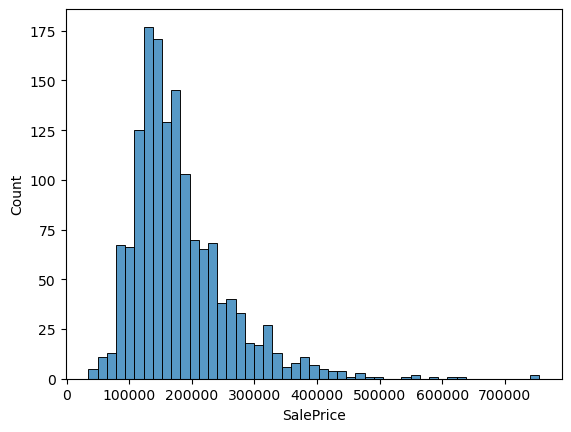

In [21]:
# Distribuição da target
sns.histplot(data=train, x='SalePrice')

# Assimetria negativa, necessária transformação por log posteriormente

## Correlação Comparativa

<Axes: >

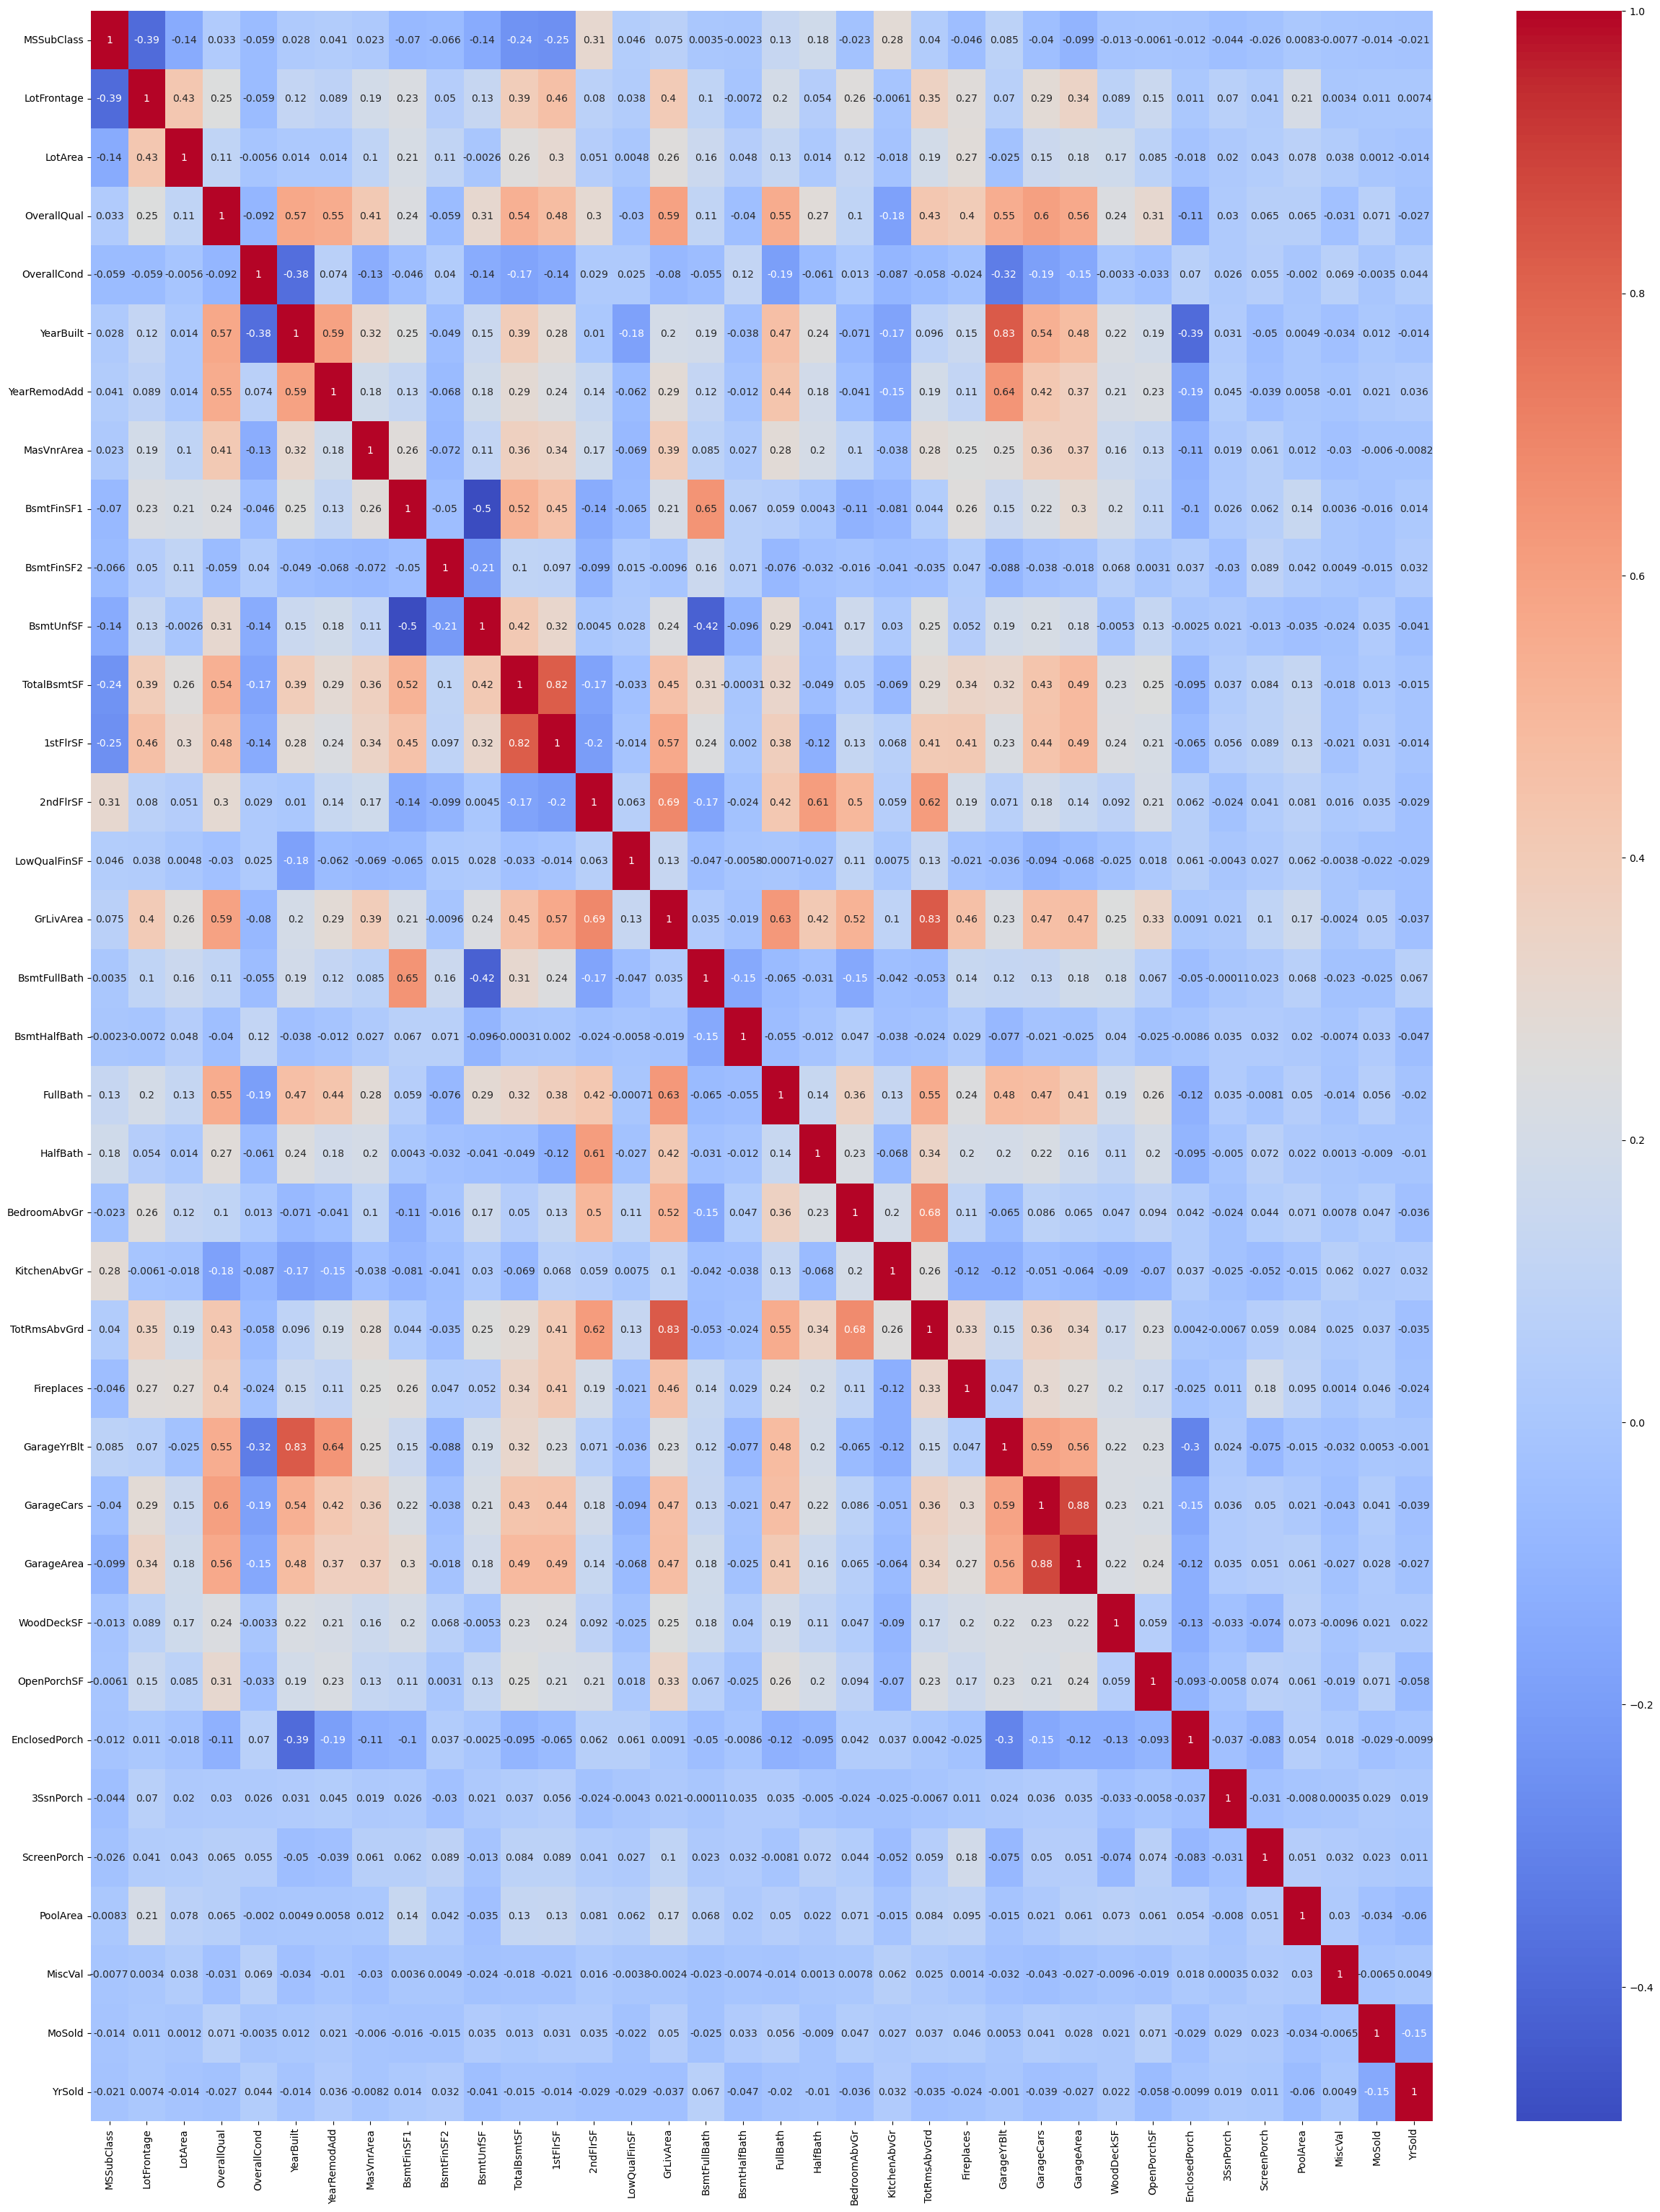

In [ ]:
# Checando correlação entre todas as features
dados_numericos = pd.DataFrame()

for feature in features_numericas:
    dados_numericos[feature] = train[feature]

corr_data = dados_numericos.corr(method='pearson')

plt.figure(figsize=(30,38))
sns.heatmap(
    data= corr_data,
    cmap='coolwarm',
    annot=True,
    fmt='.2g'
    )

In [ ]:
### Insights

# Há uma forte correlação (> 0.8) entre as variáveis:
    # GarageArea and GarageCars
    # 1stFlrSF and TotalBsmtSF
    # GrLivArea and TotRmsAbvGrd

# Podemos remover ou combiná-las em uma só feature, como:
    # df['GarageEfficiency'] = df['GarageArea'] / df['GarageCars']
    # df['LivabilityScore'] = df['GrLivArea'] + (df['FullBath'] * 2) + (df['HalfBath'])
    # df['RoomSizeAvg'] = df['GrLivArea'] / df['TotRmsAbvGrd']
    # df['BasementRatio'] = df['TotalBsmtSF'] / df['1stFlrSF']

<Axes: >

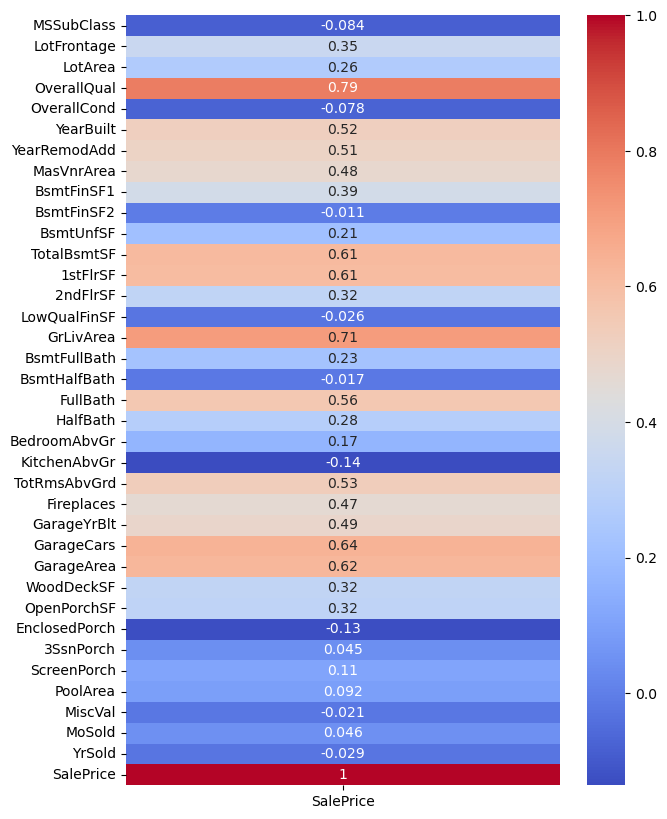

In [23]:
# Checando correlação com a target
dados_numericos['SalePrice'] = train['SalePrice']

corr_data = dados_numericos.corr(method='pearson')
corr_data = corr_data[['SalePrice']]  # mostra correlação apenas para target


plt.figure(figsize=(7,10))
sns.heatmap(
    data=corr_data, 
    cmap='coolwarm', 
    annot=True, 
    fmt='.2g')

In [ ]:
# Insights

# Essa análise nos retorna quais variáveis são fortes candidatas à inclusão no modelo, pois tem uma correlação forte com a target (>0.5).
# Também vemos quais variáveis podem ajudar a aumentar a acurácia do modelo, pois tem uma correlação moderada (0.3-0.5)

# Podemos combinar as variáveis GrLivArea + TotalBsmtSF em uma só, retornando a área total do imóvel (TotalArea)

# Engenharia de Features

## Dropando Colunas

In [ ]:
# Colunas com muitos nulos
colunas_nulos = ['PoolQC', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage']
dados_combinados.drop(labels=colunas_nulos, axis=1, inplace=True)

dados_combinados.columns, len(dados_combinados.columns)

(Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
        'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
        'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
        'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
        'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
        'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
        'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
        'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
        '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
        'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
        'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
        'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
        'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       

In [27]:
# Com base no ano de venda do imóvel, há quanto tempo foram construídos o imóvel, a garagem, e quando foi feita a reforma?
year_feature = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']

for feature in year_feature:
    dados_combinados[feature] = dados_combinados['YrSold'] - dados_combinados[feature]

dados_combinados[year_feature].head(5) 

,YearBuilt,YearRemodAdd,GarageYrBlt
Id,,,
1,5,5,5.0
2,31,31,31.0
3,7,6,7.0
4,91,36,8.0
5,8,8,8.0


## Preenchendo NAs

In [28]:
# Preenchendo colunas numéricas com 0
features_numericas = dados_combinados.select_dtypes(include=['int64', 'float64']).columns.tolist()
for feature in features_numericas:
    dados_combinados[feature] = dados_combinados[feature].fillna(0)

# Preenchendo colunas categóricas com a moda ou "Unknown"
feature_moda = ['Electrical', 'MsZoning', 'Functional', 'KitchenQual', 'Exterior2nd', 'Exterior1st', 'Utilities', 'SaleType']

for feature in features_categoricas:
    if feature not in colunas_nulos:
        if feature not in feature_moda:
            dados_combinados[feature] = dados_combinados[feature].fillna('Unknown')
        else:
            dados_combinados[feature] = dados_combinados[feature].fillna(dados_combinados[feature].mode()[0])

In [ ]:
# Checando

dados_combinados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 1 to 2919
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2919 non-null   object 
 2   LotArea        2919 non-null   int64  
 3   Street         2919 non-null   object 
 4   LotShape       2919 non-null   object 
 5   LandContour    2919 non-null   object 
 6   Utilities      2919 non-null   object 
 7   LotConfig      2919 non-null   object 
 8   LandSlope      2919 non-null   object 
 9   Neighborhood   2919 non-null   object 
 10  Condition1     2919 non-null   object 
 11  Condition2     2919 non-null   object 
 12  BldgType       2919 non-null   object 
 13  HouseStyle     2919 non-null   object 
 14  OverallQual    2919 non-null   int64  
 15  OverallCond    2919 non-null   int64  
 16  YearBuilt      2919 non-null   int64  
 17  YearRemodAdd   2919 non-null   int64  
 18  RoofStyle    

## Combinando e Criando Novas Features

In [37]:
# Criando novas features
dados_combinados['GarageEfficiency'] = dados_combinados['GarageArea'] / (dados_combinados['GarageCars'] + 1)   # +1 para evitar divisão por zero posteriormente
dados_combinados['LivabilityScore'] = dados_combinados['GrLivArea'] + (dados_combinados['FullBath'] * 2) + (dados_combinados['HalfBath'])
dados_combinados['RoomSizeAvg'] = dados_combinados['GrLivArea'] / dados_combinados['TotRmsAbvGrd']
dados_combinados['TotalArea'] = dados_combinados['GrLivArea'] + dados_combinados['TotalBsmtSF']
dados_combinados['BasementRatio'] = dados_combinados['TotalBsmtSF'] / dados_combinados['1stFlrSF']

In [36]:
# Checando
dados_combinados[['GarageEfficiency', 'LivabilityScore', 'RoomSizeAvg', 'TotalArea']].head(5)

,GarageEfficiency,LivabilityScore,RoomSizeAvg,TotalArea
Id,,,,
1,182.666667,1715,213.750000,2566.0
2,153.333333,1266,210.333333,2524.0
3,202.666667,1791,297.666667,2706.0
4,160.500000,1719,245.285714,2473.0
5,209.000000,2203,244.222222,3343.0


<Axes: >

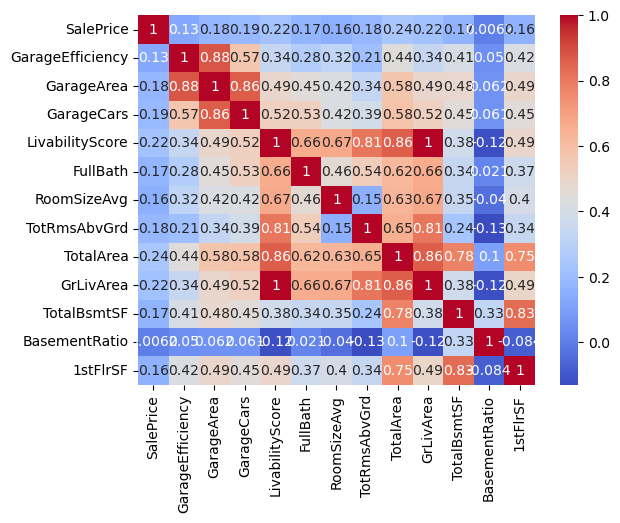

In [38]:
# Checando correlação das novas features
features_novas = dados_combinados[['SalePrice',
                                   'GarageEfficiency','GarageArea','GarageCars',
                                   'LivabilityScore', 'FullBath',
                                   'RoomSizeAvg', 'TotRmsAbvGrd',
                                   'TotalArea','GrLivArea','TotalBsmtSF',
                                   'BasementRatio', '1stFlrSF']]

corr_new_feature = features_novas.corr(method='spearman')

sns.heatmap(data=corr_new_feature, cmap='coolwarm', annot=True, fmt='.2g')

## Reduzindo Multicolinearidade
Multicolinearidade ocorre quando duas ou mais features estão altamente correlacionadas — isso pode atrapalhar modelos como regressão linear, porque fica difícil identificar o impacto individual de cada variável. 

### **O que é PCA (Análise de Componentes Principais)?**
Quando várias variáveis estão altamente correlacionadas entre si, PCA (*Principal Component Analysis*) ajuda a combinar essas variáveis em componentes principais que não são mais correlacionados.

O objetivo do PCA é encontrar uma forma de representar os dados de maneira mais simples, mas mantendo o máximo possível de informação (variância) dos dados originais.

Cada componente principal é uma combinação linear das variáveis originais. A ideia do PCA é que o primeiro componente principal (PC1) é a direção no espaço dos dados onde há a maior variabilidade dos dados. O segundo componente principal (PC2) é ortogonal ao primeiro (ou seja, em uma direção diferente) e captura a segunda maior variabilidade. Isso continua para os componentes subsequentes.

O PC1 é o componente que explica a maior parte da variância nos dados. Ou seja, ele contém a maior parte da informação de todos os dados, mas de forma condensada.
* PCA calcula os componentes principais em ordem de importância. O PC1 é o primeiro e o mais importante, pois captura a maior parte da variação nos dados.

* PC2 seria o segundo mais importante, mas geralmente captura uma parte menor da variação. Então, se você escolher apenas PC1, você estará preservando a maior parte da informação original, mas com menos variáveis.

### **Como o PCA calcula os componentes principais?**
O PCA usa uma técnica matemática chamada autovalores e autovetores para calcular as direções (componentes) que mais explicam a variância dos dados. O autovalor associado a cada componente principal indica a quantidade de variância que esse componente explica.

* PC1 tem o maior autovalor, o que significa que ele captura a maior parte da variância nos dados.

* PC2 captura a segunda maior quantidade de variância, mas sua importância é menor.

In [ ]:
# Filtrando apenas pares com multicolinearidade (> 0.8 e < 1)
corr_matrix = dados_combinados.corr(numeric_only=True)

alta_corr = corr_matrix[(corr_matrix > 0.8) & (corr_matrix < 1.0)]
print(alta_corr.dropna(how='all').dropna(axis=1, how='all'))

                  TotalBsmtSF  1stFlrSF  GrLivArea  TotRmsAbvGrd  GarageCars  \
TotalBsmtSF               NaN  0.801376        NaN           NaN         NaN   
1stFlrSF             0.801376       NaN        NaN           NaN         NaN   
GrLivArea                 NaN       NaN        NaN      0.808354         NaN   
TotRmsAbvGrd              NaN       NaN   0.808354           NaN         NaN   
GarageCars                NaN       NaN        NaN           NaN         NaN   
GarageArea                NaN       NaN        NaN           NaN     0.88989   
GarageEfficiency          NaN       NaN        NaN           NaN         NaN   
LivabilityScore           NaN       NaN   0.999998      0.808387         NaN   
TotalArea            0.827118       NaN   0.871770           NaN         NaN   

                  GarageArea  GarageEfficiency  LivabilityScore  TotalArea  
TotalBsmtSF              NaN               NaN              NaN   0.827118  
1stFlrSF                 NaN               Na

In [ ]:
# ===== Análise de Multicolinearidade e Recomendações =====
# Feature             | Manter? | Motivo
# --------------------|---------|--------------------------------------------------------
# GarageEfficiency    | ✅ Sim  | Mais expressiva que GarageArea e GarageCars
# RoomSizeAvg         | ✅ Sim  | Substitui bem GrLivArea e TotRmsAbvGrd
# LivabilityScore     | ⚠️ Ajustar ou simplificar | Correlação quase perfeita com GrLivArea
# TotalArea           | ✅ Sim  | Boa agregação geral
# BasementRatio       | ✅ Sim  | Expressa relação útil entre térreo e porão
# GarageArea          | ❌ Não  | Já está incluída em GarageEfficiency
# GarageCars          | ❌ Não  | Idem
# GrLivArea           | ❌ Não  | Substituída em outras features
# TotRmsAbvGrd        | ❌ Não  | Redundante com RoomSizeAvg e LivabilityScore
# TotalBsmtSF         | ❌ Não  | Está presente em TotalArea e BasementRatio

In [43]:
# Normalização 
zscore = StandardScaler()

# PCA sobre GarageArea + GarageCars → já temos GarageEfficiency, mas vamos comparar
multi_cols_1 = dados_combinados[['GarageArea', 'GarageCars']]
multi_cols_1_scaled = zscore.fit_transform(multi_cols_1)
pca_1 = PCA(n_components=None)
pca_1.fit(multi_cols_1_scaled)

# PCA sobre 1stFlrSF + TotalBsmtSF → já temos BasementRatio
multi_cols_2 = dados_combinados[['1stFlrSF', 'TotalBsmtSF']]
multi_cols_2_scaled = zscore.fit_transform(multi_cols_2)
pca_2 = PCA(n_components=None)
pca_2.fit(multi_cols_2_scaled)

# PCA sobre GrLivArea + TotRmsAbvGrd → já temos RoomSizeAvg
multi_cols_3 = dados_combinados[['GrLivArea', 'TotRmsAbvGrd']]
multi_cols_3_scaled = zscore.fit_transform(multi_cols_3)
pca_3 = PCA(n_components=None)
pca_3.fit(multi_cols_3_scaled)

# Exibir os resultados
for i, pca in enumerate([pca_1, pca_2, pca_3], 1):
    print(f'--- PCA {i} ---')
    print(f'Número de componentes: {pca.n_components_}')
    print(f'Variância explicada: {pca.explained_variance_ratio_}')
    print(f'Componentes PCA:\n{pca.components_}\n')

--- PCA 1 ---
Número de componentes: 2
Variância explicada: [0.94494511 0.05505489]
Componentes PCA:
[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]

--- PCA 2 ---
Número de componentes: 2
Variância explicada: [0.90068794 0.09931206]
Componentes PCA:
[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]

--- PCA 3 ---
Número de componentes: 2
Variância explicada: [0.90417721 0.09582279]
Componentes PCA:
[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]



In [ ]:
# ====================== ANÁLISE DE PCA E FEATURE ENGINEERING ==========================
# Com base na análise de PCA e nas features criadas, definimos a seguinte lógica:

# PCA 1:
# Variáveis Originais         : ['GarageArea', 'GarageCars']
# Nova Feature Criada         : 'GarageEfficiency'
# Variância Explicada (PC1)   : 94.5%
# Ação recomendada            : Usar 'GarageEfficiency', remover 'GarageArea' e 'GarageCars'

# PCA 2:
# Variáveis Originais         : ['1stFlrSF', 'TotalBsmtSF']
# Nova Feature Criada         : 'BasementRatio' e 'TotalArea'
# Variância Explicada (PC1)   : 90.0%
# Ação recomendada            : Usar 'BasementRatio' ou 'TotalArea', remover '1stFlrSF' e 'TotalBsmtSF'

# PCA 3:
# Variáveis Originais         : ['GrLivArea', 'TotRmsAbvGrd']
# Nova Feature Criada         : 'RoomSizeAvg'
# Variância Explicada (PC1)   : 90.4%
# Ação recomendada            : Usar 'RoomSizeAvg', remover 'GrLivArea' e 'TotRmsAbvGrd'

# ======================================================================================


### **Por que escolher apenas o PC1?** 
Ao rodar o PCA, percebemos que o PC1 consegue explicar 90% ou mais da variância dos dados. Isso significa que a maior parte da informação que estava distribuída entre as variáveis originais pode ser representada em um único componente (PC1).

Se escolhermos todos os componentes principais (como no caso de n_components=None), podemos acabar com muitos componentes que são menos importantes. Esses componentes podem adicionar complexidade desnecessária ao modelo, sem contribuir significativamente para a precisão. Por isso, é comum manter apenas o PC1, pois ele já explica a maior parte dos dados.

### **Vantagens de escolher apenas o PC1:**
* Redução de dimensionalidade e complexidade: Menos variáveis para o modelo trabalhar e o modelo se torna mais simples e eficiente.

* Evitar multicolinearidade: Como o PC1 é uma combinação ortogonal das variáveis originais, ele resolve o problema de variáveis correlacionadas, o que poderia afetar a performance do modelo.

In [44]:
# Selecionar PC1 e adicionar ao DataFrame
# PCA sobre GarageArea + GarageCars
pca_1 = PCA(n_components=1)
multi_cols_1_pc1 = pca_1.fit_transform(multi_cols_1_scaled)
dados_combinados['multi_cols_1'] = multi_cols_1_pc1.ravel()

# PCA sobre 1stFlrSF + TotalBsmtSF
pca_2 = PCA(n_components=1)
multi_cols_2_pc1 = pca_2.fit_transform(multi_cols_2_scaled)
dados_combinados['multi_cols_2'] = multi_cols_2_pc1.ravel()

# PCA sobre GrLivArea + TotRmsAbvGrd
pca_3 = PCA(n_components=1)
multi_cols_3_pc1 = pca_3.fit_transform(multi_cols_3_scaled)
dados_combinados['multi_cols_3'] = multi_cols_3_pc1.ravel()

# Exibir as novas colunas no DataFrame
print(dados_combinados[['multi_cols_1', 'multi_cols_2', 'multi_cols_3']].head())

    multi_cols_1  multi_cols_2  multi_cols_3
Id                                          
1       0.464147     -0.860506      0.990230
2       0.175397      0.522225     -0.537153
3       0.661023     -0.642538      0.195159
4       1.700468     -0.831570      0.549371
5       2.337032      0.123753      2.122873


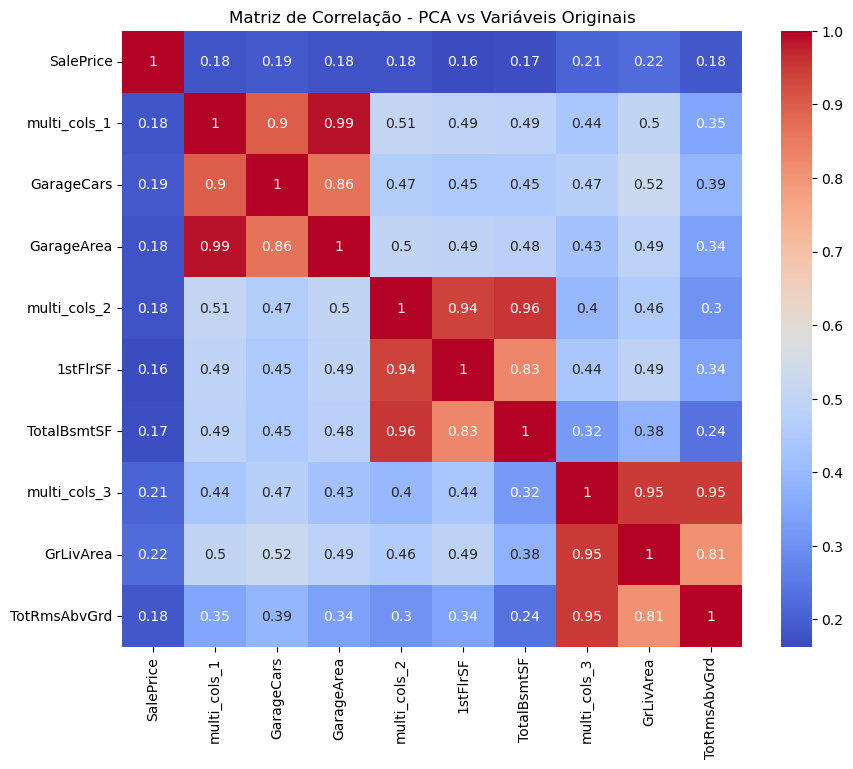

In [ ]:
# Checando
# Selecionar colunas relevantes para checagem de correlação
multi = dados_combinados[[
    'SalePrice',         
    'multi_cols_1',      # PCA de GarageArea e GarageCars
    'GarageCars', 
    'GarageArea',
    'multi_cols_2',      # PCA de 1stFlrSF e TotalBsmtSF
    '1stFlrSF', 
    'TotalBsmtSF',
    'multi_cols_3',      # PCA de GrLivArea e TotRmsAbvGrd
    'GrLivArea', 
    'TotRmsAbvGrd'
]]

# Calcular a matriz de correlação com método de Spearman
multi_corr = multi.corr(method='spearman')

# Visualizar como mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(data=multi_corr, annot=True, fmt='.2g', cmap='coolwarm')
plt.title('Matriz de Correlação - PCA vs Variáveis Originais')
plt.show()

## Dropando Features com Multicolinearidade

In [47]:
multi_corr = ['GarageCars','GarageArea','1stFlrSF', 'TotalBsmtSF','GrLivArea', 'TotRmsAbvGrd']

dados_combinados.drop(labels= multi_corr, axis=1, inplace=True )

dados_combinados.head(5)

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,SalePrice,GarageEfficiency,LivabilityScore,RoomDensity,TotalArea,RoomSizeAvg,BasementRatio,multi_cols_1,multi_cols_2,multi_cols_3
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,208500.0,182.666667,1715,213.750000,2566.0,213.750000,1.000000,0.464147,-0.860506,0.990230
2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,181500.0,153.333333,1266,210.333333,2524.0,210.333333,1.000000,0.175397,0.522225,-0.537153
3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,223500.0,202.666667,1791,297.666667,2706.0,297.666667,1.000000,0.661023,-0.642538,0.195159
4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,140000.0,160.500000,1719,245.285714,2473.0,245.285714,0.786681,1.700468,-0.831570,0.549371
5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,250000.0,209.000000,2203,244.222222,3343.0,244.222222,1.000000,2.337032,0.123753,2.122873


In [48]:
dados_combinados.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '2ndFlrSF',
       'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Functional',
       'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscFeature',
       'MiscVal', 'MoSold', 'YrS

# Transformação de Features

## Corrigindo Assimetria

In [65]:
# Corrigindo assimetria de variáveis contínuas para uma curva de Gauss

# Selecionando dados contínuos
dados_transformados = dados_combinados.select_dtypes(include=['int64', 'float64'])

# Apenas aquelas com mais de 25 valores únicos, isto é, que não sejam categóricas disfarçadas
features_continuas  = [col for col in dados_transformados if len(dados_transformados[col].unique()) > 25] 
dados_transformados = dados_combinados[features_continuas].copy()

# Remove Target
dados_transformados.drop(labels=['SalePrice'], axis=1 , inplace=True)

# Checando assimetria
skewness = dados_transformados.skew().sort_values(ascending=False)

# Aplicando transformação
# cols_to_transform = skewness[(skewness > 1) | (skewness < -1)].index # Seleção automática ou...
cols_to_transform = ['LotArea', 'TotalArea', 'multi_cols_2', 'BsmtUnfSF']

for col in cols_to_transform:
    # O método 'yeo-johnson' é uma versão melhorada do log: pois funciona com valores positivos e negativos (ao contrário do log).
    yeo_johnson = PowerTransformer(method='yeo-johnson', standardize=True, copy=True)
    dados_combinados[[col]] = yeo_johnson.fit_transform(dados_combinados[[col]])

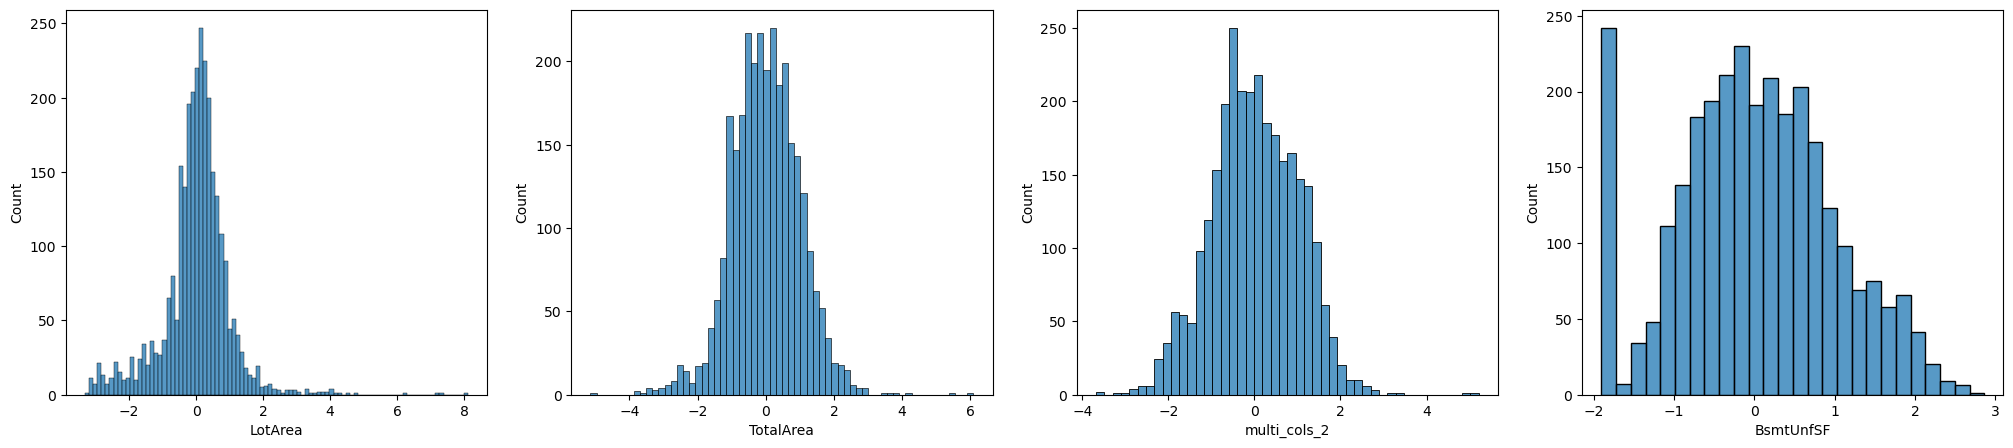

In [67]:
# Checando após transformação
fig , axes = plt.subplots(nrows=1, ncols=4, figsize=(25,5))

for i , feature in enumerate(cols_to_transform):
    sns.histplot(data=dados_combinados, x=feature, ax=axes[i%5])

plt.show()

## One Hot Encoder

In [68]:
dados_combinados = pd.get_dummies(dados_combinados).reset_index(drop=True)
dados_combinados


,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,-0.146987,7,5,5,5,1.251524,0.803482,-0.367307,-0.885878,...,False,False,False,True,False,False,False,False,True,False
1,20,0.105772,6,8,31,31,-0.805318,1.016173,-0.367307,-0.467317,...,False,False,False,True,False,False,False,False,True,False
2,60,0.428327,7,5,7,6,1.216532,0.578328,-0.367307,-0.092320,...,False,False,False,True,False,False,False,False,True,False
3,70,0.095308,7,5,91,36,-0.805318,0.150470,-0.367307,0.143158,...,False,False,False,True,True,False,False,False,False,False
4,60,0.927254,8,5,8,8,1.348087,0.756729,-0.367307,0.034391,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,-2.714534,4,7,36,36,-0.805318,-1.353408,-0.367307,0.155956,...,False,False,False,True,False,False,False,False,True,False
2915,160,-2.748635,4,5,36,36,-0.805318,0.225830,-0.367307,-0.440111,...,False,False,False,True,True,False,False,False,False,False
2916,20,1.673267,5,7,46,10,-0.805318,1.171992,-0.367307,-1.906532,...,False,False,False,True,True,False,False,False,False,False
2917,85,0.275419,5,5,14,14,-0.805318,0.375345,-0.367307,0.217091,...,False,False,False,True,False,False,False,False,True,False


## Divisão dos dados novamente

In [69]:
train_novo = dados_combinados.iloc[:len(train), :]
test_novo  = dados_combinados.iloc[len(train_novo):, :]

x_train = train_novo.drop(labels=['SalePrice'], axis=1)

# Transformação de log da Target 
y_train = np.log1p(train_novo['SalePrice'])

x_test = test_novo.drop(labels=['SalePrice'], axis=1)

x_train.shape , y_train.shape, x_test.shape

((1460, 287), (1460,), (1459, 287))

## Checando distribuição novamente
Será necessário normalizar features com outliers e que não tem distribuição normal. Também usaremos Z-score para normalizar features que possuem uma distribuição próxima da normal.

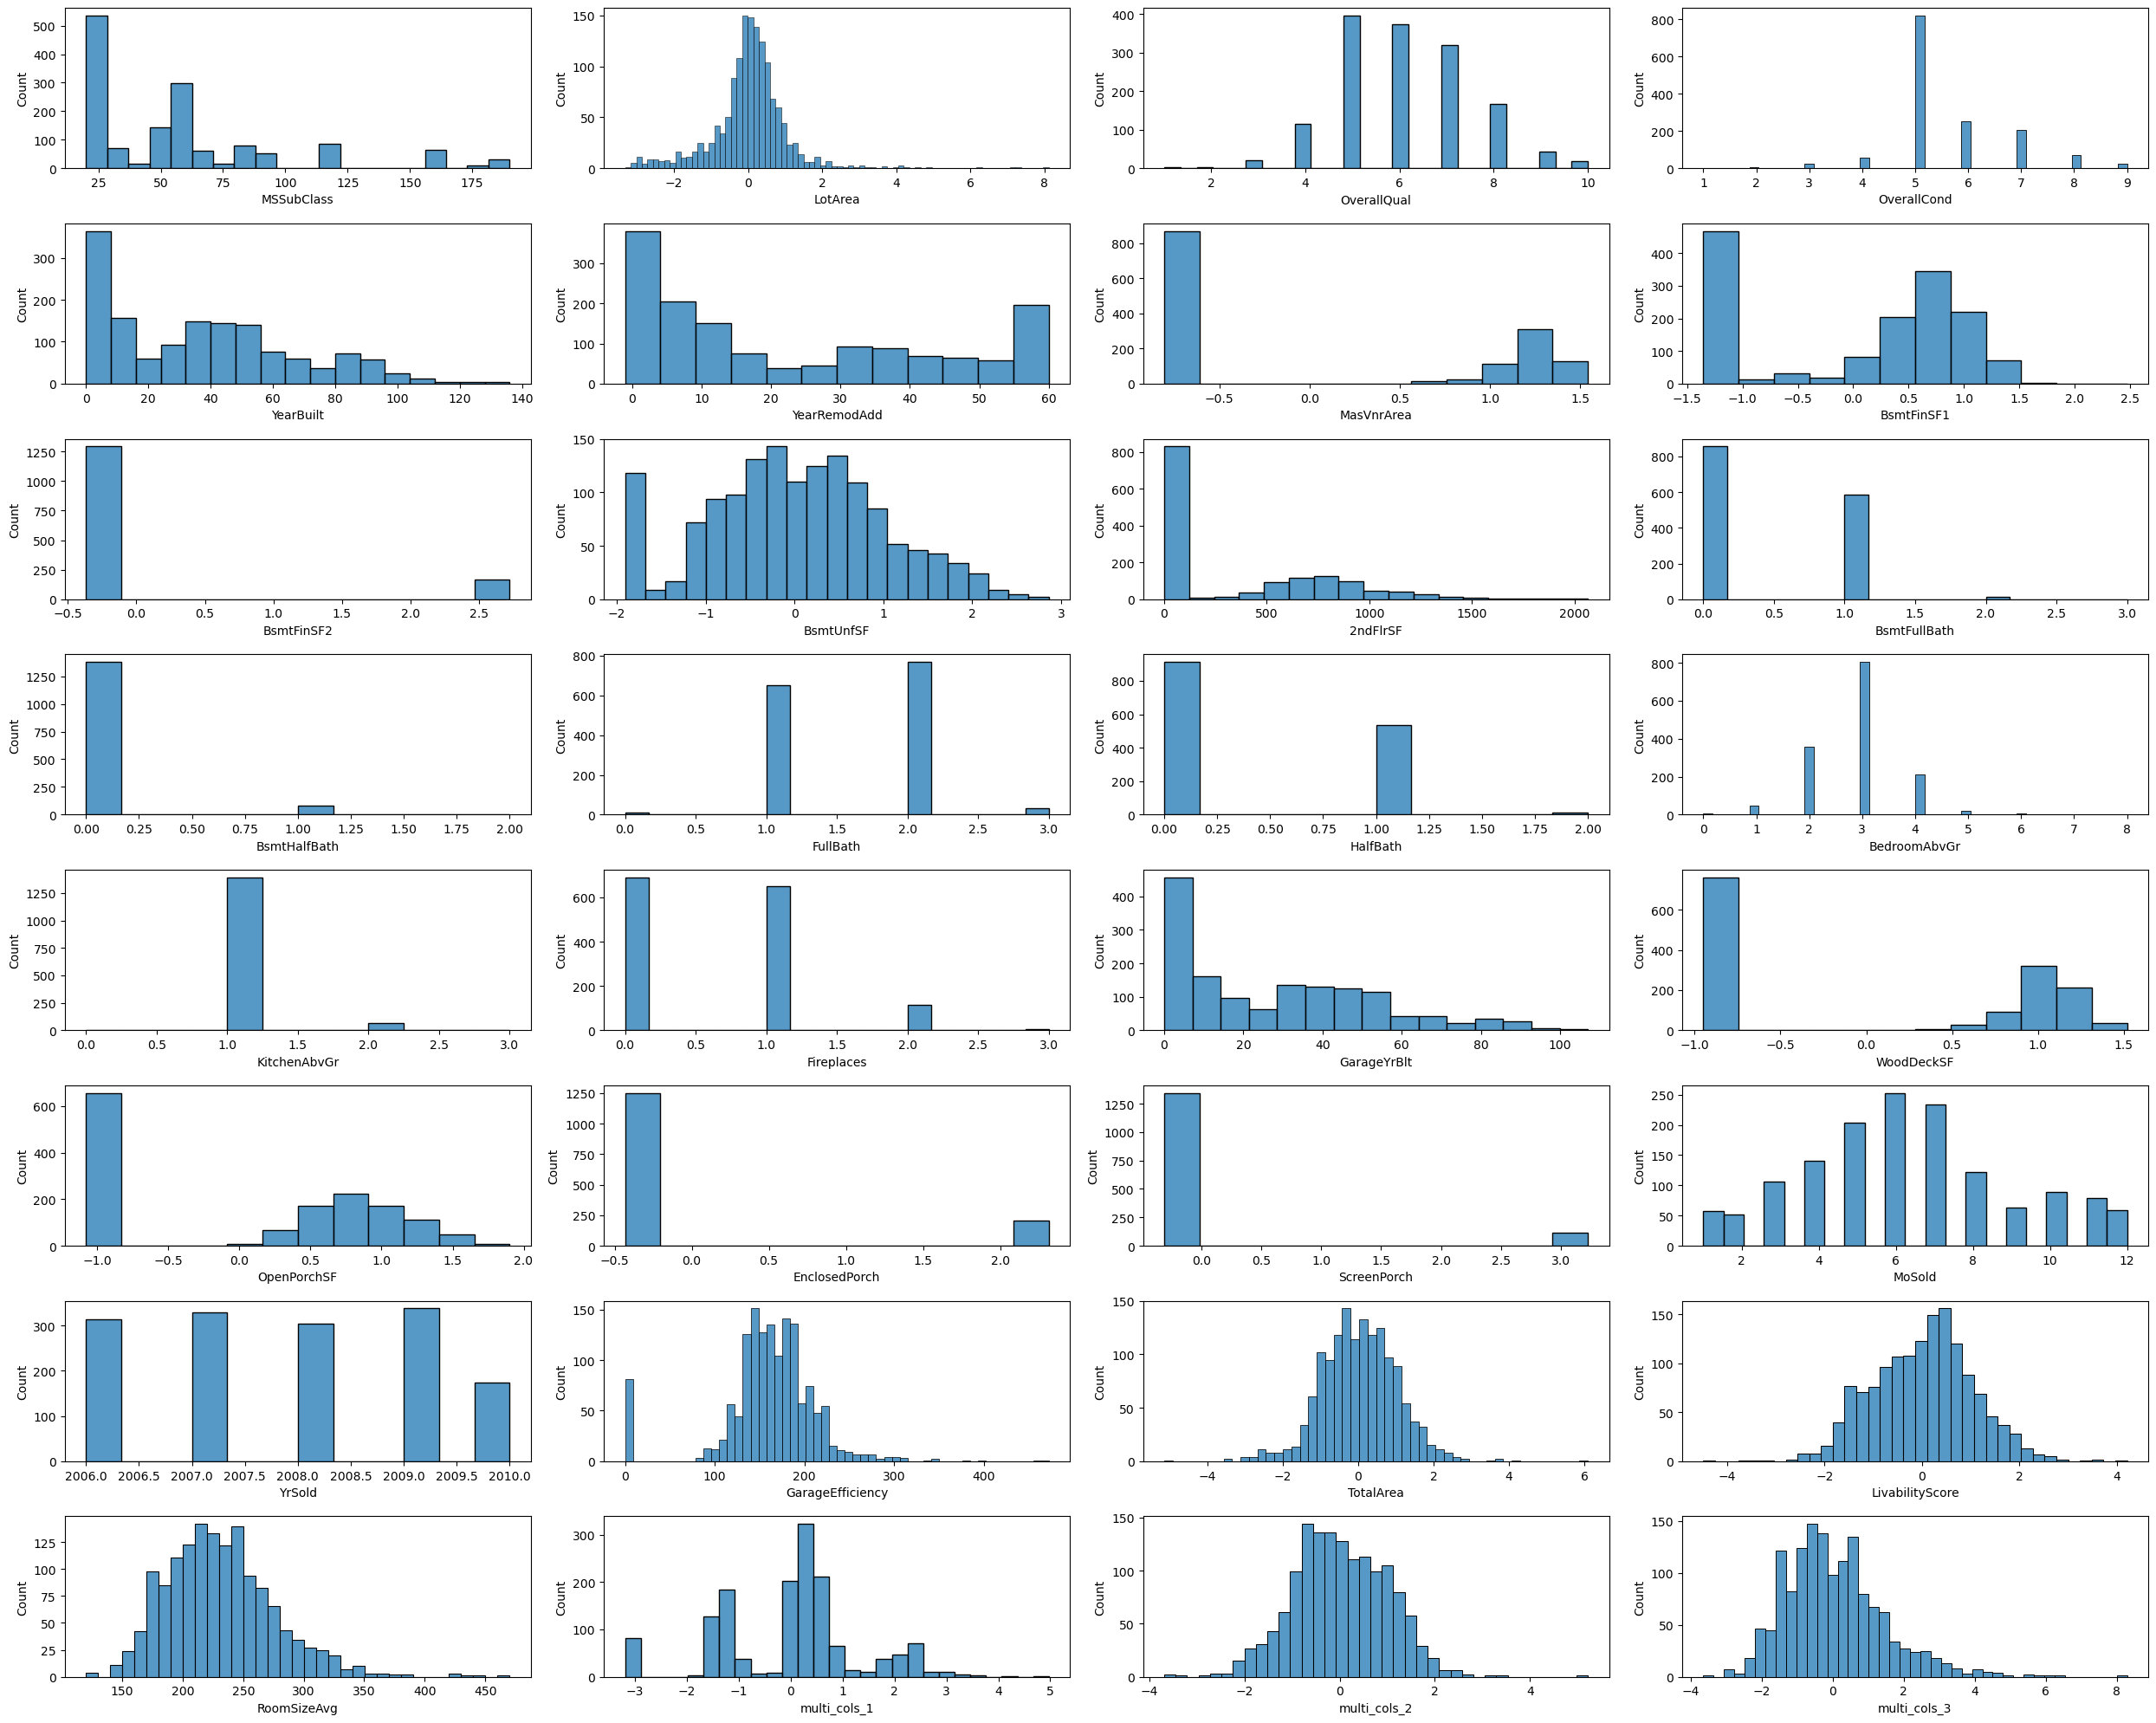

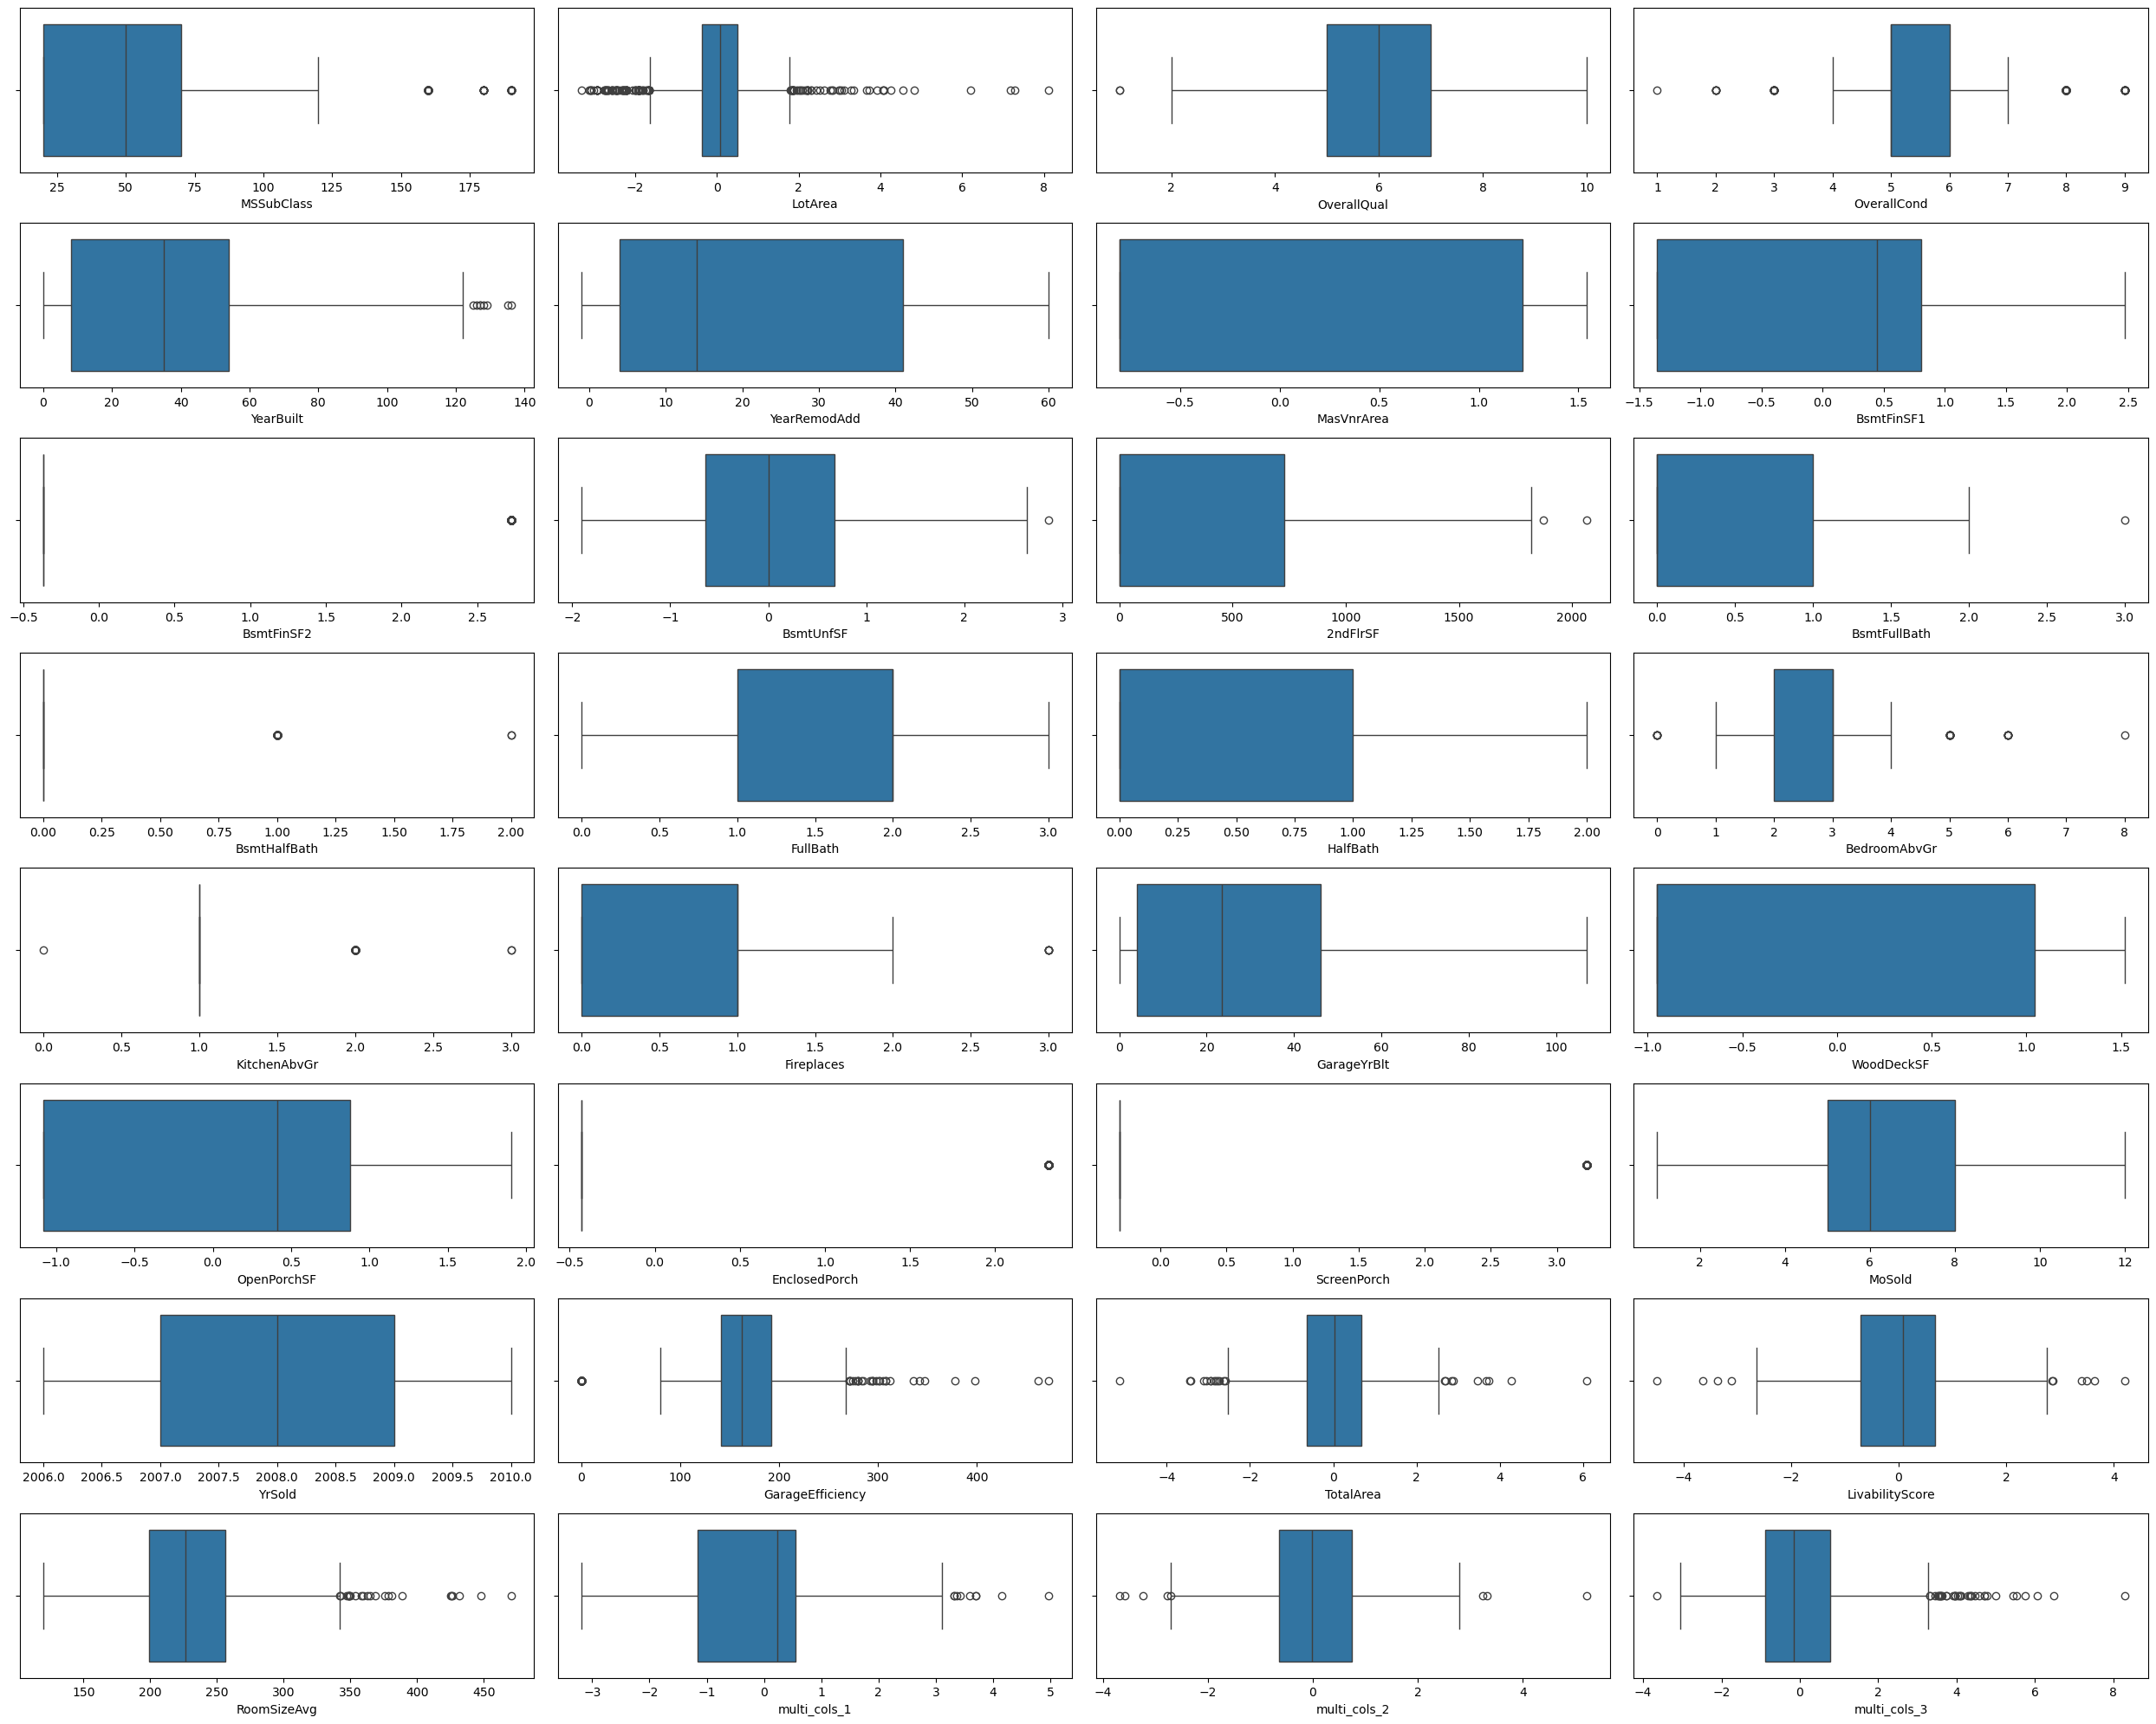

In [76]:
# Seleção de variáveis numéricas
features_numericas = ['MSSubClass','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','2ndFlrSF','BsmtFullBath',
                     'BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','Fireplaces','GarageYrBlt','WoodDeckSF','OpenPorchSF','EnclosedPorch','ScreenPorch',
                     'MoSold','YrSold','GarageEfficiency','TotalArea', 'LivabilityScore', 'RoomSizeAvg','multi_cols_1','multi_cols_2','multi_cols_3']


# HISTOGRAMA
fig, axes = plt.subplots(nrows=8, ncols=4, figsize=(25, 20))
for i, feature in enumerate(features_numericas):
    row = i // 4
    col = i % 4
    sns.histplot(data=x_train, x=feature, ax=axes[row, col])
plt.tight_layout()
plt.show()

# BOXPLOT
fig, axes = plt.subplots(nrows=8, ncols=4, figsize=(25, 20))
for i, feature in enumerate(features_numericas):
    row = i // 4
    col = i % 4
    sns.boxplot(data=x_train, x=feature, ax=axes[row, col])
plt.tight_layout()
plt.show()


## Normalização

In [78]:
# CHOOSE COLUMNS TO NORMALIZE
cols_to_robust = ['MSSubClass','YearRemodAdd', '2ndFlrSF','BedroomAbvGr','OpenPorchSF','MasVnrArea','EnclosedPorch','BsmtFinSF1','ScreenPorch',
                  'BsmtFinSF2','GarageYrBlt','YearBuilt','WoodDeckSF']
cols_to_zscore = ['GarageEfficiency', 'GarageEfficiency', 'LotArea','TotalArea','OverallQual','multi_cols_1','OverallCond','multi_cols_2','BsmtUnfSF','multi_cols_3']

# ROBUST SCALING NORM
robust = RobustScaler()
robust.fit(x_train[cols_to_robust])

x_train[cols_to_robust] = robust.transform(x_train[cols_to_robust])
x_test[cols_to_robust]  = robust.transform(x_test[cols_to_robust])

# ZSCORE NORM
zscore = StandardScaler()
zscore.fit(x_train[cols_to_zscore])

x_train[cols_to_zscore] = zscore.transform(x_train[cols_to_zscore])
x_test[cols_to_zscore]  = zscore.transform(x_test[cols_to_zscore])

x_train.shape , x_test.shape

((1460, 287), (1459, 287))

# Desenvolvimento de Modelos

## Lazy Model
LazyRegressor é um *automatizador* de model selection para tarefas de regressão.
Ele treina vários algoritmos de regressão populares em paralelo, sem a necessidade de configurar cada um individualmente, e retorna uma tabela comparativa com as métricas de desempenho.

In [83]:
x_train_lazy , x_test_lazy , y_train_lazy , y_test_lazy = train_test_split(x_train, y_train, test_size=0.2, random_state=12, shuffle=True)

lazy_model = LazyRegressor(verbose=0, random_state=12, regressors='all')
train_lazy , test_lazy = lazy_model.fit(x_train_lazy, x_test_lazy, y_train_lazy, y_test_lazy)
test_lazy

  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0,000561 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4065
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 37
[LightGBM] [Info] Start training from score 12,023467


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GradientBoostingRegressor,-7.08,0.89,0.14,0.52
NuSVR,-7.16,0.89,0.14,0.26
LassoCV,-7.48,0.88,0.14,0.09
ElasticNetCV,-7.49,0.88,0.14,0.13
HistGradientBoostingRegressor,-7.52,0.88,0.14,0.34
LassoLarsCV,-7.52,0.88,0.14,0.04
LassoLarsIC,-7.56,0.88,0.14,0.03
LGBMRegressor,-7.61,0.88,0.14,0.13
LinearRegression,-7.61,0.88,0.14,0.02


In [84]:
# Selecionando os 5 modelos com menor RMSE
top5_rmse = test_lazy.sort_values(by='RMSE').head(5)
print(top5_rmse)


                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
GradientBoostingRegressor                   -7.08       0.89  0.14        0.52
NuSVR                                       -7.16       0.89  0.14        0.26
LassoCV                                     -7.48       0.88  0.14        0.09
ElasticNetCV                                -7.49       0.88  0.14        0.13
HistGradientBoostingRegressor               -7.52       0.88  0.14        0.34


In [89]:
# No momento atual dos meus estudos, desses 5 modelos selecionados, sou familiar apenas com o GradientBoosting.
# Após separar ele como melhor opção, vou selecionar outros modelos que sou familiar apenas para fins de comparação, sendo eles:

# GradientBoostingRegressor = Melhor
# HistGradientBoostingRegressor, LGBMRegressor, LinearRegression, PoissonRegressor, RandomForestRegressor, XGBRegressor, BaggingRegressor, DecisionTreeRegressor

# Lista dos modelos para testar
modelos = {
    'GradientBoosting': GradientBoostingRegressor(random_state=42),
    'HistGradientBoosting': HistGradientBoostingRegressor(random_state=42),
    'LGBM': LGBMRegressor(random_state=42, verbose =-1),
    'XGBoost': XGBRegressor(random_state=42),
    'RandomForest': RandomForestRegressor(random_state=42),
    'Bagging': BaggingRegressor(random_state=42),
    'DecisionTree': DecisionTreeRegressor(random_state=42),
    'LinearRegression': LinearRegression(),
    'PoissonRegression': PoissonRegressor()
}

# Treinar e avaliar os modelos
resultados = []

for nome, modelo in modelos.items():
    modelo.fit(x_train_lazy, y_train_lazy)
    y_pred = modelo.predict(x_test_lazy)
    rmse = np.sqrt(mean_squared_error(y_test_lazy, y_pred))
    resultados.append((nome, rmse))

# Ordenar os resultados
resultados.sort(key=lambda x: x[1])  # menor RMSE primeiro

# Exibir os top 5
for nome, rmse in resultados[:5]:
    print(f'{nome}: RMSE = {rmse:.4f}')

LGBM: RMSE = 0.1305
HistGradientBoosting: RMSE = 0.1337
GradientBoosting: RMSE = 0.1340
RandomForest: RMSE = 0.1468
XGBoost: RMSE = 0.1518


In [94]:
# Forçar redefinição de resultados como dicionário vazio
resultados = {}

for nome, modelo in modelos.items():
    # MSE negativo (é o que o cross_val_score retorna), então fazemos -score e depois raiz quadrada para RMSE
    scores = cross_val_score(modelo, x_train, y_train, 
                             scoring='neg_root_mean_squared_error', 
                             cv=5)
    rmse_medio = -scores.mean()
    resultados[nome] = rmse_medio

df_resultados = pd.DataFrame(resultados.items(), columns=['Modelo', 'RMSE'])
df_resultados.sort_values(by='RMSE', ascending=True, inplace=True)

# Mostrar ranking
display(df_resultados)

,Modelo,RMSE
0,GradientBoosting,0.13
2,LGBM,0.13
1,HistGradientBoosting,0.13
3,XGBoost,0.14
4,RandomForest,0.14
5,Bagging,0.15
6,DecisionTree,0.20
8,PoissonRegression,0.25
7,LinearRegression,15142426.90


## Encontrando os melhores Hiperparâmetros usando o Optuna
O Otuna é mais eficiente e exige menos custo computacional que o GridSearch, pois ele realiza a busca de maneira mais inteligente, explorando o espaço de hiperparâmetros de forma mais eficiente. Ele aprende com os testes anteriores e ajusta os parâmetros, sendo significativamente mais rápido e eficiente em termos computacionais.

Realiza uma busca baseada em otimização bayesiana e inteligente, ou seja, tenta aprender com as tentativas anteriores e não testa todas as combinações.

Ao contrário da grade discreta do GridSearch, o espaço de busca do Optuna pode ser contínuo e muito mais flexível. Ele pode explorar valores contínuos, como alpha entre 0.01 e 100, ou valores inteiros em intervalos não fixos.

Por fim, o Optuna pode implementar estratégias de parada precoce, o que significa que ele pode interromper testes que não estão proporcionando boas melhorias.

### GradientBoostingRegressor 

In [95]:
def gbr_objective(trial):

    # Definindo o espaço de busca para os hiperparâmetros
    n_estimators    = trial.suggest_int('n_estimators', 50, 2000)
    learning_rate   = trial.suggest_float('learning_rate', 0.001, 1)
    max_depth       = trial.suggest_int('max_depth', 2, 16)
    subsample       = trial.suggest_float('subsample', 0.1, 1)
    min_sample_split = trial.suggest_int('min_samples_split', 2, 25)
    max_features     = trial.suggest_int('max_features', 5, 60)

    # Criando o modelo GradientBoostingRegressor com os hiperparâmetros sugeridos
    gbr = GradientBoostingRegressor(n_estimators=n_estimators, 
                                      learning_rate=learning_rate, 
                                      max_depth=max_depth, 
                                      subsample=subsample,
                                      min_samples_split=min_sample_split,
                                      max_features=max_features,
                                      random_state=42)

    # Avaliando o modelo com cross-validation
    score = cross_val_score(estimator=gbr, 
                            X=x_train, 
                            y=y_train, 
                            scoring='neg_root_mean_squared_error', 
                            cv=5)

    return score.mean()

# Criando o estudo Optuna
study_gbr = optuna.create_study(direction='maximize')
study_gbr.optimize(gbr_objective, n_trials=200)

# Imprimindo os melhores parâmetros e a melhor pontuação
print(f'Melhor CV    : {study_gbr.best_params}')
print(f'Melhor Score : {study_gbr.best_value}')

gbr_best_params = study_gbr.best_params

[I 2025-04-17 14:47:28,620] A new study created in memory with name: no-name-d52be0b2-0e21-4441-ad7b-a25b6a9c98f3
[I 2025-04-17 14:47:30,202] Trial 0 finished with value: -255365019238352.1 and parameters: {'n_estimators': 402, 'learning_rate': 0.9776959887398261, 'max_depth': 6, 'subsample': 0.16651524548711316, 'min_samples_split': 4, 'max_features': 14}. Best is trial 0 with value: -255365019238352.1.
[I 2025-04-17 14:47:33,141] Trial 1 finished with value: -1.3959419506058851e+29 and parameters: {'n_estimators': 1063, 'learning_rate': 0.9569303204384485, 'max_depth': 5, 'subsample': 0.10478818854139799, 'min_samples_split': 7, 'max_features': 7}. Best is trial 0 with value: -255365019238352.1.
[I 2025-04-17 14:47:35,376] Trial 2 finished with value: -26.65735053432229 and parameters: {'n_estimators': 295, 'learning_rate': 0.930297526577688, 'max_depth': 5, 'subsample': 0.30946469910237806, 'min_samples_split': 8, 'max_features': 60}. Best is trial 2 with value: -26.65735053432229.


Melhor CV    : {'n_estimators': 1834, 'learning_rate': 0.013262739472843116, 'max_depth': 4, 'subsample': 0.7051306029512735, 'min_samples_split': 16, 'max_features': 51}
Melhor Score : -0.11762365505662561


In [96]:
# Fit do modelo
gbr_best_params = {'n_estimators': 1834, 
                   'learning_rate': 0.013262739472843116, 
                   'max_depth': 4, 
                   'subsample': 0.7051306029512735, 
                   'min_samples_split': 16, 
                   'max_features': 51}

gbm = GradientBoostingRegressor(random_state=42, **gbr_best_params)
gbm.fit(x_train,y_train)

GradientBoostingRegressor(learning_rate=0.013262739472843116, max_depth=4,
                          max_features=51, min_samples_split=16,
                          n_estimators=1834, random_state=42,
                          subsample=0.7051306029512735)

Text(0.5, 1.0, 'Feature Importantes GBM')

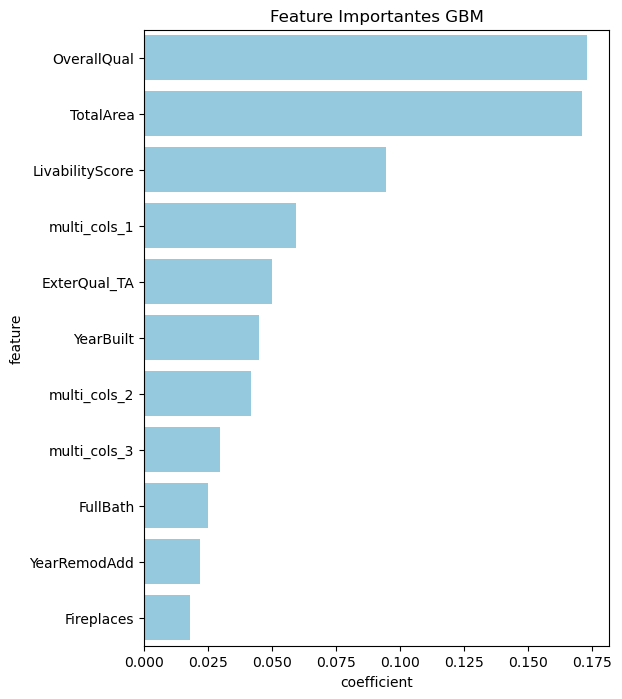

In [97]:
# Visualizando importância de features do modelo

# Criando DF
features_importance = pd.DataFrame({
    'feature' : gbm.feature_names_in_,   # pega o nome da feature
    'coefficient' : gbm.feature_importances_  # pega o coeficiente de cada feature
})

features_importance = features_importance.sort_values(by='coefficient', ascending= False).reset_index(drop=True)

top_10 = features_importance.loc[:10, :]
plt.figure(figsize=(6,8))
sns.barplot(x= top_10['coefficient'], y= top_10['feature'], color='skyblue')
plt.title('Feature Importantes GBM')

### LGBM 

In [99]:
def lgbm_objective(trial):

    # Definindo o espaço de busca para os hiperparâmetros
    num_leaves        = trial.suggest_int('num_leaves',20,100)
    max_depth         = trial.suggest_int('max_depth', 2, 15)
    learning_rate     = trial.suggest_float('learning_rate', 0.001, 0.8)
    n_estimators      = trial.suggest_int('n_estimators', 100, 2000)
    min_child_weight  = trial.suggest_int('min_child_weight', 0.5, 5)
    min_child_samples = trial.suggest_int('min_child_samples', 7, 20)
    subsample         = trial.suggest_uniform('subsample', 0.4, 1)
    reg_alpha         = trial.suggest_float('reg_alpha', 0.02, 15)
    reg_lambda        = trial.suggest_float('reg_lambda', 0.02, 15)

    # Criando o modelo GradientBoostingRegressor com os hiperparâmetros sugeridos
    lgbm = lightgbm.LGBMRegressor(boosting_type    ='gbdt',
                             num_leaves       = num_leaves,
                             max_depth        = max_depth,
                             learning_rate    = learning_rate,
                             n_estimators     = n_estimators,
                             min_child_weight = min_child_weight,
                             min_child_samples= min_child_samples,
                             subsample        = subsample,
                             reg_alpha        = reg_alpha,
                             reg_lambda       = reg_lambda, 
                             random_state=42)

    # Avaliando o modelo com cross-validation
    score = cross_val_score(estimator=lgbm, 
                            X=x_train, 
                            y=y_train, 
                            scoring='neg_root_mean_squared_error', 
                            cv=5)

    return score.mean()

# Criando o estudo Optuna
study_lgbm = optuna.create_study(direction='maximize')
study_lgbm.optimize(lgbm_objective, n_trials=200)

# Imprimindo os melhores parâmetros e a melhor pontuação
print(f'Melhor CV    : {study_lgbm.best_params}')
print(f'Melhor Score : {study_lgbm.best_value}')

lgbm_best_params = study_lgbm.best_params

[I 2025-04-17 15:21:34,250] A new study created in memory with name: no-name-50a96720-262e-4b12-b660-bfb8657215b5
[I 2025-04-17 15:21:34,859] Trial 0 finished with value: -0.16111565852437618 and parameters: {'num_leaves': 51, 'max_depth': 3, 'learning_rate': 0.7624027163319647, 'n_estimators': 1496, 'min_child_weight': 4, 'min_child_samples': 19, 'subsample': 0.491985706908311, 'reg_alpha': 4.488029688567617, 'reg_lambda': 10.603044784920021}. Best is trial 0 with value: -0.16111565852437618.
[I 2025-04-17 15:21:35,353] Trial 1 finished with value: -0.1450195314646152 and parameters: {'num_leaves': 86, 'max_depth': 10, 'learning_rate': 0.3690528967670886, 'n_estimators': 1001, 'min_child_weight': 2, 'min_child_samples': 12, 'subsample': 0.9662300235260501, 'reg_alpha': 2.3181670954720857, 'reg_lambda': 0.09023332670103448}. Best is trial 1 with value: -0.1450195314646152.
[I 2025-04-17 15:21:35,934] Trial 2 finished with value: -0.1349776008904353 and parameters: {'num_leaves': 33, 'm

Melhor CV    : {'num_leaves': 95, 'max_depth': 2, 'learning_rate': 0.06662732395185533, 'n_estimators': 1835, 'min_child_weight': 1, 'min_child_samples': 16, 'subsample': 0.44646756223069783, 'reg_alpha': 0.022851088384092194, 'reg_lambda': 0.8804262407453393}
Melhor Score : -0.12536910381876104


In [100]:
# Fit do modelo
lgbm_best_params = {
    'num_leaves': 95, 
    'max_depth': 2, 
    'learning_rate': 0.06662732395185533, 
    'n_estimators': 1835, 
    'min_child_weight': 1, 
    'min_child_samples': 16, 
    'subsample': 0.44646756223069783, 
    'reg_alpha': 0.022851088384092194, 
    'reg_lambda': 0.8804262407453393}
    
lgbm = lightgbm.LGBMRegressor(random_state=42, **lgbm_best_params)
lgbm.fit(x_train, y_train)

LGBMRegressor(learning_rate=0.06662732395185533, max_depth=2,
              min_child_samples=16, min_child_weight=1, n_estimators=1835,
              num_leaves=95, random_state=42, reg_alpha=0.022851088384092194,
              reg_lambda=0.8804262407453393, subsample=0.44646756223069783)

Text(0.5, 1.0, 'Feature Importantes LGBM')

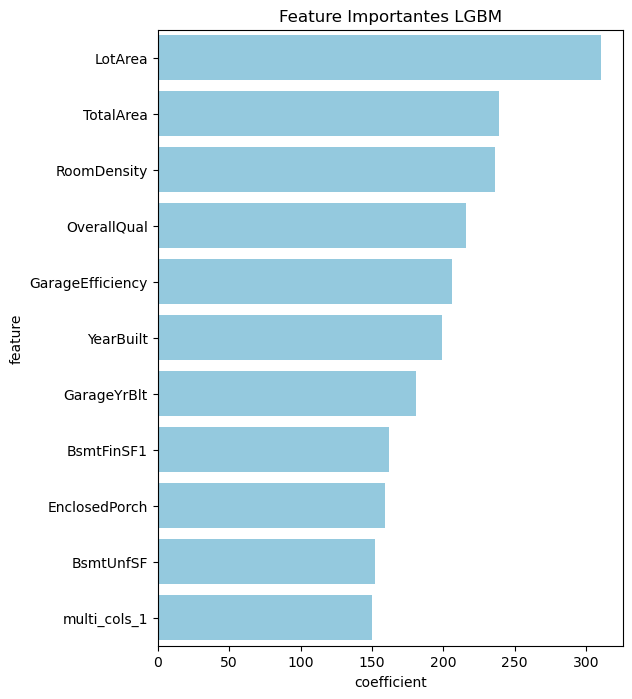

In [101]:
# Visualizando importância de features do modelo

# Criando DF
features_importance = pd.DataFrame({
    'feature' : lgbm.feature_names_in_,   # pega o nome da feature
    'coefficient' : lgbm.feature_importances_  # pega o coeficiente de cada feature
})

features_importance = features_importance.sort_values(by='coefficient', ascending= False).reset_index(drop=True)

top_10 = features_importance.loc[:10, :]
plt.figure(figsize=(6,8))
sns.barplot(x= top_10['coefficient'], y= top_10['feature'], color='skyblue')
plt.title('Feature Importantes LGBM')

### HistGradientBoosting 

In [104]:
def hgbm_objective(trial):

    # Definindo o espaço de busca para os hiperparâmetros
    max_iter = trial.suggest_int('max_iter', 50, 1000)
    learning_rate = trial.suggest_float('learning_rate', 0.001, 0.3)
    max_depth = trial.suggest_int('max_depth', 3, 25)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 5, 100)
    max_bins = trial.suggest_int('max_bins', 2, 255)
    l2_regularization = trial.suggest_float('l2_regularization', 0.0, 5.0)

    # Criando o modelo GradientBoostingRegressor com os hiperparâmetros sugeridos
    hgbm = HistGradientBoostingRegressor(max_iter=max_iter,
                                          learning_rate=learning_rate,
                                          max_depth=max_depth,
                                          min_samples_leaf=min_samples_leaf,
                                          max_bins=max_bins,
                                          l2_regularization= l2_regularization,
                                          random_state=42
                                          )


    # Avaliando o modelo com cross-validation
    score = cross_val_score(estimator=hgbm, 
                            X=x_train, 
                            y=y_train, 
                            scoring='neg_root_mean_squared_error', 
                            cv=5)

    return score.mean()

# Criando o estudo Optuna
study_hgbm = optuna.create_study(direction='maximize')
study_hgbm.optimize(hgbm_objective, n_trials=200)

# Imprimindo os melhores parâmetros e a melhor pontuação
print(f'Melhor CV    : {study_hgbm.best_params}')
print(f'Melhor Score : {study_hgbm.best_value}')

hgbm_best_params = study_hgbm.best_params

[I 2025-04-17 15:31:50,193] A new study created in memory with name: no-name-c26adb37-b135-41c6-a223-946ad091ac06
[I 2025-04-17 15:31:57,840] Trial 0 finished with value: -0.13333586121455274 and parameters: {'max_iter': 354, 'learning_rate': 0.18611659417453355, 'max_depth': 20, 'min_samples_leaf': 15, 'max_bins': 101, 'l2_regularization': 2.212720981044278}. Best is trial 0 with value: -0.13333586121455274.
[I 2025-04-17 15:32:00,177] Trial 1 finished with value: -0.13494934101188477 and parameters: {'max_iter': 175, 'learning_rate': 0.10184644741318187, 'max_depth': 15, 'min_samples_leaf': 58, 'max_bins': 123, 'l2_regularization': 3.976400237866228}. Best is trial 0 with value: -0.13333586121455274.
[I 2025-04-17 15:32:02,590] Trial 2 finished with value: -0.14631066560168765 and parameters: {'max_iter': 331, 'learning_rate': 0.01395113077953505, 'max_depth': 6, 'min_samples_leaf': 99, 'max_bins': 98, 'l2_regularization': 0.8636210146863077}. Best is trial 0 with value: -0.133335861

Melhor CV    : {'max_iter': 545, 'learning_rate': 0.09858891172910828, 'max_depth': 3, 'min_samples_leaf': 16, 'max_bins': 117, 'l2_regularization': 1.2046837891086255}
Melhor Score : -0.1250491437189632


In [105]:
# Fit do modelo
hgbm_best_params = {
    'max_iter': 545, 
    'learning_rate': 0.09858891172910828, 
    'max_depth': 3, 
    'min_samples_leaf': 16, 
    'max_bins': 117, 
    'l2_regularization': 1.2046837891086255}

hgbm = HistGradientBoostingRegressor(random_state=42, **hgbm_best_params)
hgbm.fit(x_train, y_train)

HistGradientBoostingRegressor(l2_regularization=1.2046837891086255,
                              learning_rate=0.09858891172910828, max_bins=117,
                              max_depth=3, max_iter=545, min_samples_leaf=16,
                              random_state=42)

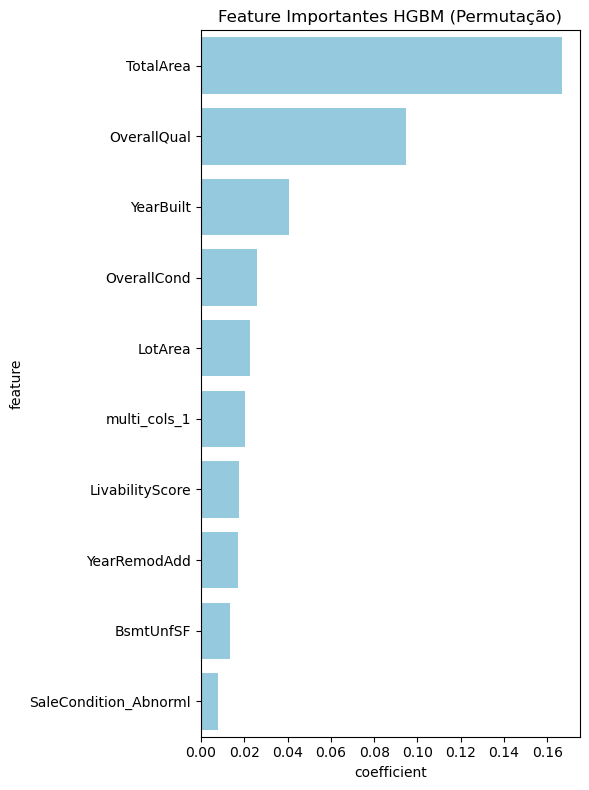

In [108]:
# Visualizando importância de features do modelo

# Calculando importância de features via permutação
result = permutation_importance(hgbm, x_train, y_train, 
                                scoring='neg_root_mean_squared_error', 
                                n_repeats=10, random_state=42)

# Criando DF
features_importance = pd.DataFrame({
    'feature': x_train.columns,
    'coefficient': result.importances_mean
}).sort_values(by='coefficient', ascending=False).reset_index(drop=True)

features_importance = features_importance.sort_values(by='coefficient', ascending= False).reset_index(drop=True)

# Top 10 features
top_10 = features_importance.head(10)

# Visualizando
plt.figure(figsize=(6,8))
sns.barplot(x=top_10['coefficient'], y=top_10['feature'], color='skyblue')
plt.title('Feature Importantes HGBM (Permutação)')
plt.tight_layout()
plt.show()

# Criando um Stacking Regressor

In [111]:
# Definindo validação cruzada
cv_fold = KFold(n_splits= 10, shuffle=True, random_state=42)

# Dicionário com estimadores finais a testar
final_estimators = {
    "RidgeCV": RidgeCV(),
    "LassoCV": LassoCV(),
    "Linear": LinearRegression(),
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42)
}

# Inicialização para comparação
melhor_modelo = None
melhor_nome = None
melhor_rmse = float('inf')

# Loop pelos modelos finais
for nome, final_est in final_estimators.items():
    model = StackingRegressor(
        estimators=[
            ('GradientBoostingRegressor', gbm),
            ('lightgbm', lgbm),
            ('HistGradientBoostingRegressor', hgbm)
        ],
        final_estimator=final_est,
        cv=cv_fold,
        n_jobs=-1
    )

    score = cross_val_score(model, x_train, y_train, scoring='neg_root_mean_squared_error', cv=cv_fold)
    mean_rmse = -score.mean()
    std_rmse = score.std()

    print(f'{nome:<15} RMSE: {mean_rmse:.4f} ± {std_rmse:.4f}')

    # Atualiza o melhor se necessário
    if mean_rmse < melhor_rmse:
        melhor_rmse = mean_rmse
        melhor_modelo = model
        melhor_nome = nome

print(f'\n🏆 Melhor modelo final: {melhor_nome} com RMSE médio de {melhor_rmse:.4f}')

# Treinando o modelo final com melhor final_estimator
melhor_modelo.fit(x_train, y_train)

RidgeCV         RMSE: 0.1170 ± 0.0211
LassoCV         RMSE: 0.1167 ± 0.0211
Linear          RMSE: 0.1169 ± 0.0210
RandomForest    RMSE: 0.1283 ± 0.0213

🏆 Melhor modelo final: LassoCV com RMSE médio de 0.1167


StackingRegressor(cv=KFold(n_splits=10, random_state=42, shuffle=True),
                  estimators=[('GradientBoostingRegressor',
                               GradientBoostingRegressor(learning_rate=0.013262739472843116,
                                                         max_depth=4,
                                                         max_features=51,
                                                         min_samples_split=16,
                                                         n_estimators=1834,
                                                         random_state=42,
                                                         subsample=0.7051306029512735)),
                              ('lightgbm',
                               LGBMRegressor(learning_rate=0.06662732395185533,
                                             max_d...
                                             random_state=42,
                                             reg_alpha=0.022851088384092194,
                                             reg_lambda=0.8804262407453393,
                                             subsample=0.44646756223069783)),
                              ('HistGradientBoostingRegressor',
                               HistGradientBoostingRegressor(l2_regularization=1.2046837891086255,
                                                             learning_rate=0.09858891172910828,
                                                             max_bins=117,
                                                             max_depth=3,
                                                             max_iter=545,
                                                             min_samples_leaf=16,
                                                             random_state=42))],
                  final_estimator=LassoCV(), n_jobs=-1)

# Salvando Modelo e Gerando submissão

In [114]:
# Fazendo predições no conjunto de teste
y_pred = np.expm1(melhor_modelo.predict(x_test))

# Criando a saída
output = pd.DataFrame({'Id': submission['Id'], 'SalePrice': y_pred})

# Salvando o arquivo para submissão
output.to_csv('submission.csv', index=False)

print("✅ Arquivo 'submission.csv' criado com sucesso!")


✅ Arquivo 'submission.csv' criado com sucesso!
